In [32]:
print("Name: Harish P")
print("RegNo: 21BBS0204")

#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

Name: Harish P
RegNo: 21BBS0204


# Task 1. Loading the Dataset

In [33]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (7)\Mall_Customers.csv")
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [34]:
df.shape

(200, 4)

# Task 2. Data Preprocessing Including Visualization

Visualization


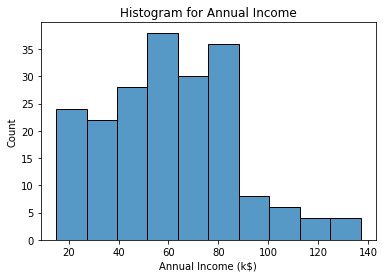

In [35]:
# Univariate Analysis - 1.

sns.histplot(df['Annual Income (k$)'])
plt.title('Histogram for Annual Income')
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


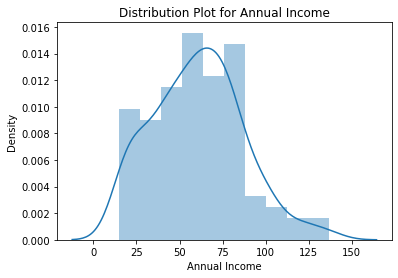

In [36]:
# Univariate Analysis - 2.

sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution Plot for Annual Income')
plt.xlabel('Annual Income')
plt.show()

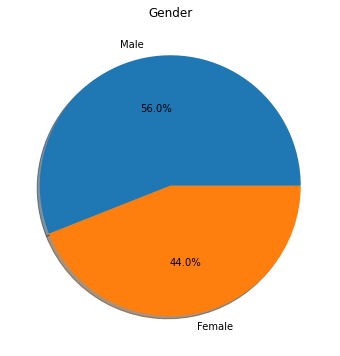

In [37]:
# Univariate Analysis - 3.

x = df.Gender.unique().tolist()

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('white') 

plt.pie(df.Gender.value_counts(),labels = x,autopct ='%1.1f%%',shadow = True)
plt.title('Gender')
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


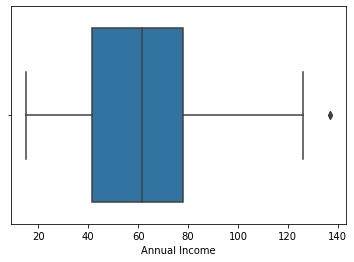

In [38]:
# Univariate Analysis 4.

sns.boxplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income')
plt.show()

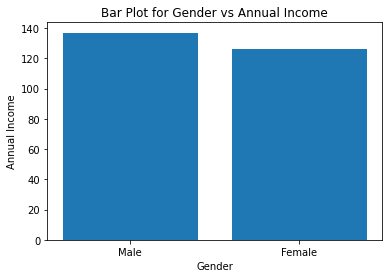

In [39]:
# Bivaraiate Analysis - 1. 

x= df['Gender']
y= df['Annual Income (k$)']

plt.bar(x,y)
plt.title('Bar Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')

plt.show()

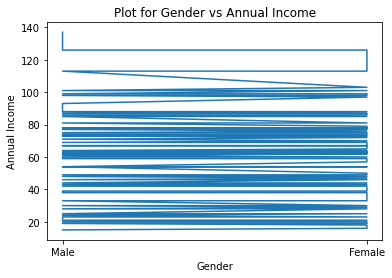

In [40]:
# Bivaraiate Analysis - 2.

plt.plot(x,y)
plt.title('Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

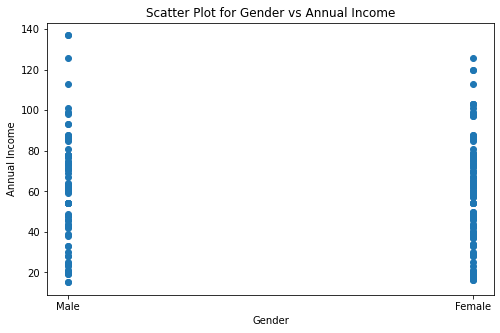

In [41]:
# Bivaraiate Analysis - 3.

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('Scatter Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


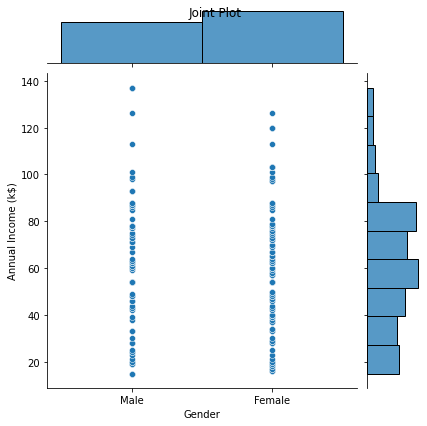

In [42]:
# Bivaraiate Analysis - 4.

g= sns.jointplot(x,y)
g.fig.suptitle('Joint Plot',ha="center")
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


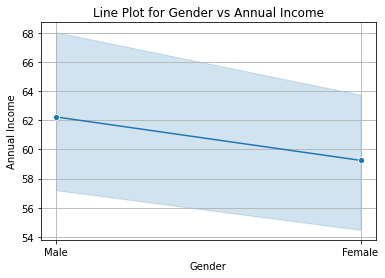

In [43]:
#Bivariate Analysis - 5.

sns.lineplot(x,y,marker='o')
plt.title('Line Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()


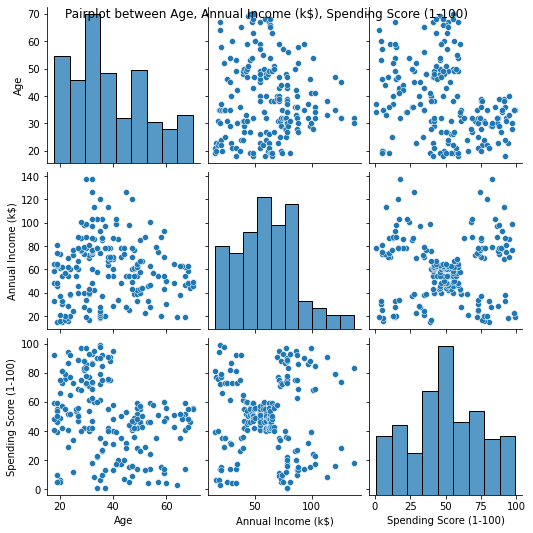

In [44]:
# Multivariate Analysis - 1.
num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()


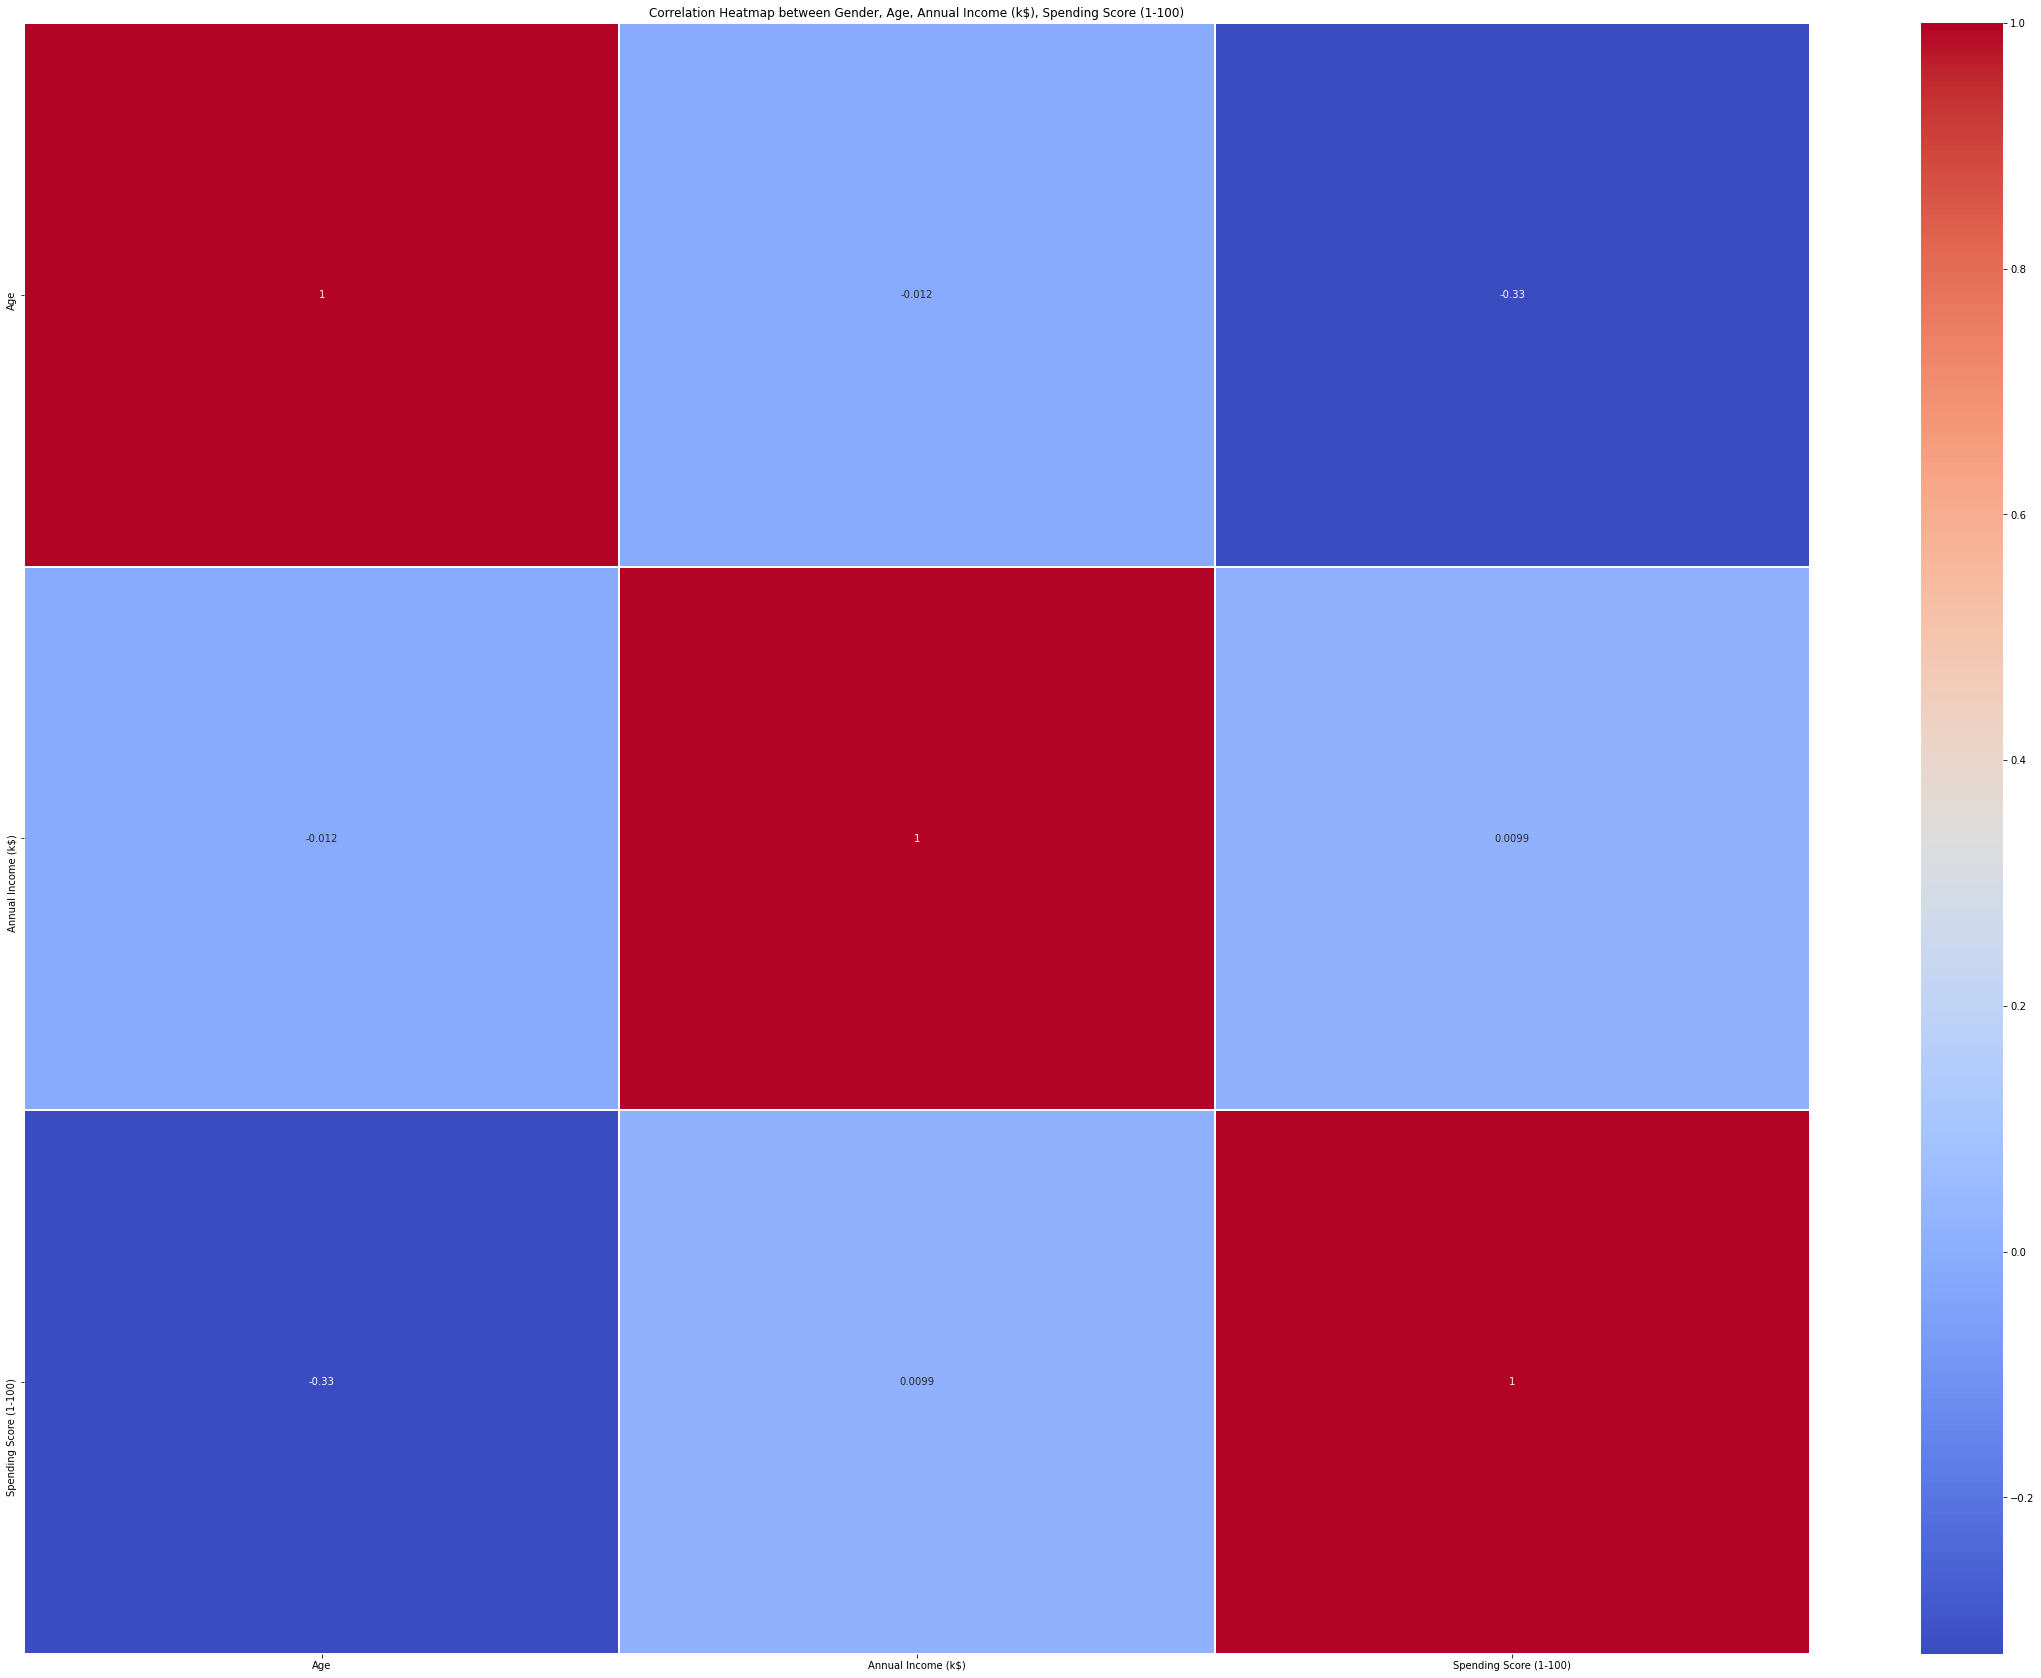

In [45]:
# Multivariate Analysis - 2.

l=df.columns.tolist()
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

Data Preprocessing

In [46]:
# Descriptive Statistics.

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [47]:
# Handling the Missing Values.

df.isnull().sum()

# There is null values which has to be handled.

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [49]:
# Encoding the Gender Column

le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)

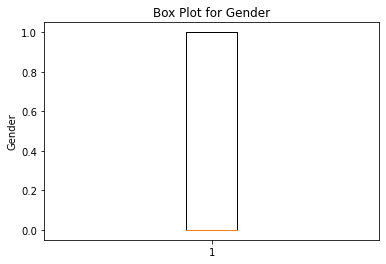

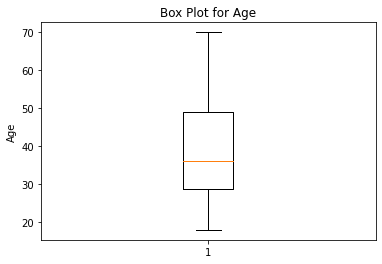

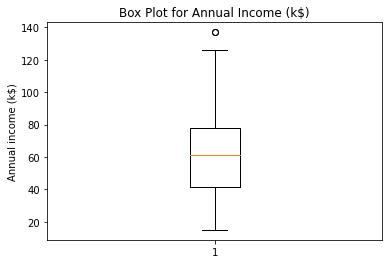

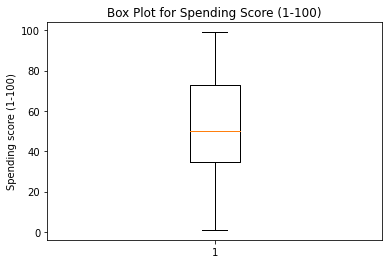

In [50]:
# Finding the outliers and Replacing them. Replacement with Median

# Replacement of Outliers in Culmen Length.

for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()


In [51]:
# Finding the Number of Outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))


Number of Outliers in Gender: 0
Number of Outliers in Age: 0
Number of Outliers in Annual Income (k$): 2
Number of Outliers in Spending Score (1-100): 0


In [52]:
# Outlier Replacement by Median.

def replace_outliers_with_median(data, column, lower_bound, upper_bound):
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = replace_outliers_with_median(df, i, lower_bound, upper_bound)

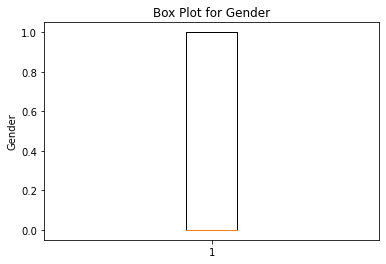

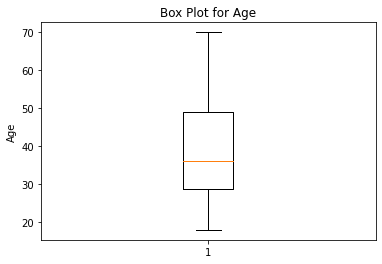

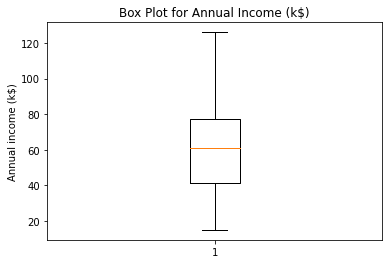

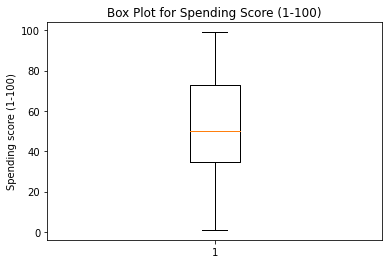

In [53]:
# Rechecking for any outliers

for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()


In [54]:
# Rechecking for the number of outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in Gender: 0
Number of Outliers in Age: 0
Number of Outliers in Annual Income (k$): 0
Number of Outliers in Spending Score (1-100): 0


In [55]:
# Scaling
scale =MinMaxScaler()
df=pd.DataFrame(scale.fit_transform(df),columns =df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


# Task 3. Model Building

Model Building

In [58]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)
  
error

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[87.64248645238288,
 38.256261727718474,
 30.536154520353268,
 23.373975282700414,
 20.102172077784843,
 17.128172918518988,
 14.85057352036488,
 12.608723763869849,
 10.917668890407116,
 9.591940516007261]

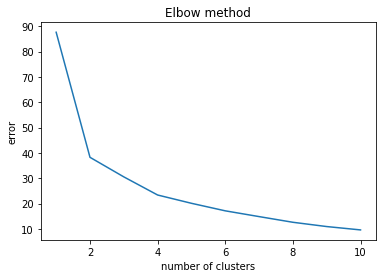

In [59]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [65]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)
km_model.fit(df)

KMeans(n_clusters=4, random_state=0)

In [66]:
pred = km_model.predict(df)
pred

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3])

Testing the Model

In [67]:
km_model.predict([[0.0,0.019231,1.000000,0.387755]])

array([1])

In [68]:
km_model.predict([[1.0,0.038462,0.09009,0.051020]])

array([0])